# Homework 


   

## Instructor

    Dr. Fatima Boukari
    Division: PEMaCS
    
    


## Problem 1: 

Predict penguins species based on two body measurements: culmen length and culmen depth. 

Q1: Load the data 'penguins_species.csv`

In [3]:
# Write your code here.
import pandas as pd
df = pd.read_csv('penguins_species.csv')

Q2: Show the different penguins species in the dataset, the number of samples of each specie? 

- Using Visualization of 2 figures: One bar plot and one pie plot. 

Number of species of each kind: 
Species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64


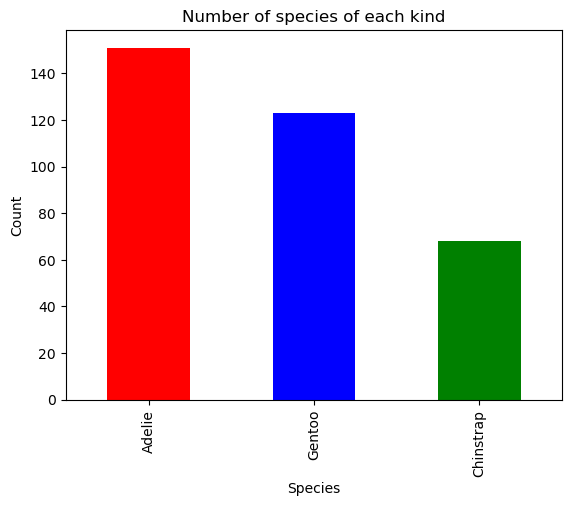

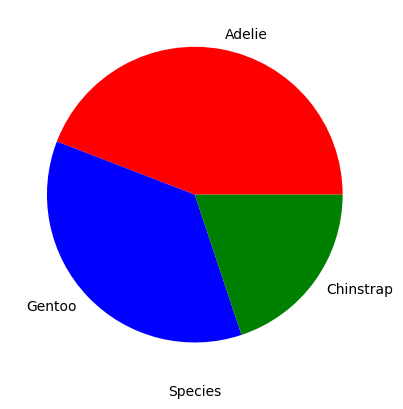

In [9]:
# Write your code here.
import matplotlib.pyplot as plt
species = df["Species"].value_counts()
print(f"Number of species of each kind: \n{species}")

# Bar plot
species.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title("Number of species of each kind")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

# Pie chart
species.plot(kind='pie', colors=['red', 'blue', 'green'])
plt.xlabel("Species")
plt.ylabel(None)
plt.show()

Q3: Plot histograms for the numerical features including the kernel

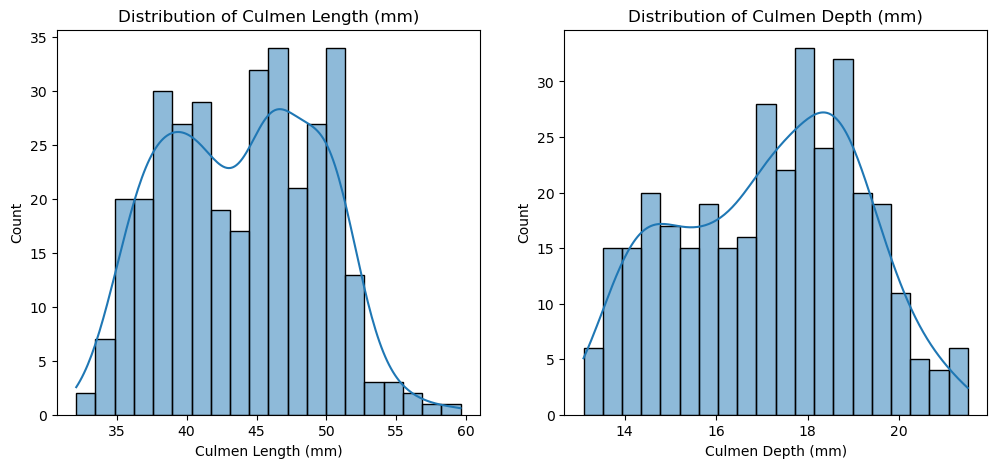

In [16]:
# Write your code here.
import seaborn as sns

cols = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(12, 5))
length = len(cols)
for i, col in enumerate(cols, 1):
    plt.subplot(1, length, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")

Q4: Show features distribution for each class. Hint: use
[`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

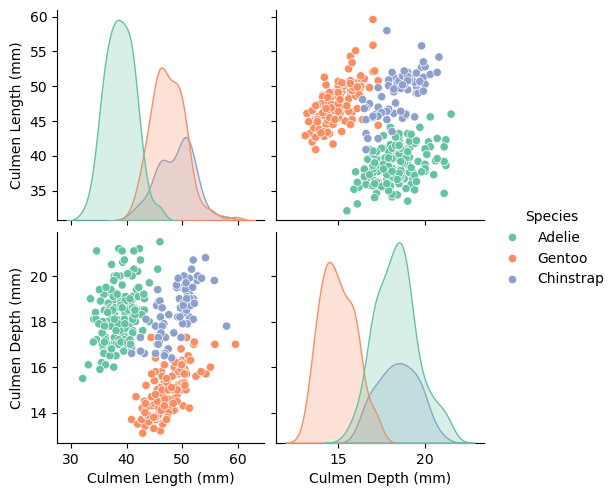

In [17]:
# Write your code here.
sns.pairplot(df, hue="Species", diag_kind="kde", palette="Set2")
plt.show()

## Problem 2 
In this problem, we apply `LogisticRegression` to predicts 2 different classes: 

class `1` for `' Low'` and 

class `0` for `' High'` 
    
then show the estimated and real classes.

In [18]:
import pandas as pd
import numpy as np

empl = pd.read_csv("Employment.csv")
empl.head(10)

,age,Job_Category,Level,Nb_Years_School,Ed,marital-status,occupation,sex,gains,losses,hours-per-week,Orig_Country,Output_Class
0,25,Private,12th,12,7,Never-married,Machine-op-inspct,Male,0,0,40,USA,Low
1,38,Private,HS-grad,13,9,Married-civ-spouse,Farming-fishing,Male,0,0,50,USA,Low
2,28,Local-gov,Assoc-acdm,16,12,Married-civ-spouse,Protective-serv,Male,0,0,40,USA,High
3,44,Private,Few Years College,14,10,Married-civ-spouse,Machine-op-inspct,Male,7688,0,40,USA,High
4,18,?,Few Years College,14,10,Never-married,?,Female,0,0,30,USA,Low
5,34,Private,10th,10,6,Never-married,Other-service,Male,0,0,30,USA,Low
6,29,?,HS-grad,13,9,Never-married,?,Male,0,0,40,USA,Low
7,63,Self-emp-not-inc,Prof-school,19,15,Married-civ-spouse,Prof-specialty,Male,3103,0,32,USA,High
8,24,Private,Few Years College,14,10,Never-married,Other-service,Female,0,0,40,USA,Low
9,55,Private,7th-8th,8,4,Married-civ-spouse,Craft-repair,Male,0,0,10,USA,Low


Q1: Split the dataset to have the output labels separated from the inout features used for training
used to train our predictive model.

In [21]:
# Write your code here.  
outputY = empl["Output_Class"]
outputX = empl.drop(columns=["Output_Class"])
print(outputX.shape)
print(outputY.shape)

(48842, 12)
(48842,)


Q2: Select the following numerical columns to use for training: `"age"`, `"gains"`, `"losses"` and `"hours-per-week"`

In [23]:
# Write your code here.
training_cols = empl[["age", "gains", "losses", "hours-per-week"]]
training_cols.head(10)

,age,gains,losses,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30
5,34,0,0,30
6,29,0,0,40
7,63,3103,0,32
8,24,0,0,40
9,55,0,0,10


Q3: Split the data and output label into a train and test set.

In [28]:
from sklearn.model_selection import train_test_split

# Write your code here.
X_train, X_test, y_train, y_test = train_test_split(training_cols, outputY, random_state=1)

print("Training: ")
print(f"{X_train.shape}, {y_train.shape} \n")


print("Testing:")
print(f"{X_test.shape}, {y_test.shape}")


Training: 
(36631, 4), (36631,) 

Testing:
(12211, 4), (12211,)


Q4: Compute the logistic regression model. 

Hint: use `LogisticRegression` method from the scikit-learn and the `linear_model` package then Fit the linear model using the numpy arrays of the features and the labels for the training data set.

In [29]:
# Write your code here.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

Q5: Show the intercept and coefficients of the logistic Regression

In [30]:
# Insert your code here
print(f"logistic regression intercept: {lr.intercept_}")
print(f"logistic regression intercept: {lr.coef_}")

logistic regression intercept: [4.89885525]
logistic regression intercept: [[-0.03844081 -0.00032282 -0.00075712 -0.04466573]]


Recall that the logistic regression model outputs probabilities for each class. The class with the highest probability is taken as the score (prediction). 

Q6: Show the probabilities of a sample of these class probabilities for the test feature set. 

In [ ]:

# Write your code here.
expected = lr.predict_proba(X_test)
print(f"{expected[:12]}")

array([[0.12779901, 0.87220099],
       [0.10421859, 0.89578141],
       [0.10201676, 0.89798324],
       [0.35502944, 0.64497056],
       [0.12357511, 0.87642489],
       [0.16616773, 0.83383227],
       [0.18091479, 0.81908521],
       [0.27990996, 0.72009004],
       [0.21079491, 0.78920509],
       [0.18232666, 0.81767334],
       [0.27985131, 0.72014869],
       [0.35333823, 0.64666177]])

Q7: show the classes estimated by our classifier versus the actual classes from our dataset using probability threshold = 0.5.    Print predicted values and actual values

In [40]:
# Insert your code here
# Solution

# default probability threshold is already 0.5
prediction = lr.predict(X_test)

result = pd.DataFrame({"Prediction": prediction, "Actual": y_test})
print(result.head(20))


      Prediction Actual
391          Low    Low
1899         Low    Low
24506        Low   High
32816        Low    Low
47892        Low    Low
21561        Low    Low
808          Low    Low
19596        Low    Low
931          Low    Low
29559        Low    Low
39438        Low    Low
31203        Low   High
34679        Low    Low
5372         Low    Low
31850        Low    Low
31465        Low    Low
31459        Low    Low
38143       High   High
15230        Low    Low
27311        Low    Low
